## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Checking the fraud and non-fraud class imbalance
round(df['Class'].value_counts(normalize=True)*100, 2)

0    99.83
1     0.17
Name: Class, dtype: float64

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

From the above data we can clearly see that the data is highly imbalanced. We have 492 fraudulent transaction and 284315 non-fraudulent transaction. Target variable distribution shows that we are dealing with an highly imbalanced problem as there are many more genuine transactions class as compared to the fraudalent transactions. The model would achieve high accuracy as it would mostly predict majority class

Here we will observe the distribution of our classes

In [6]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

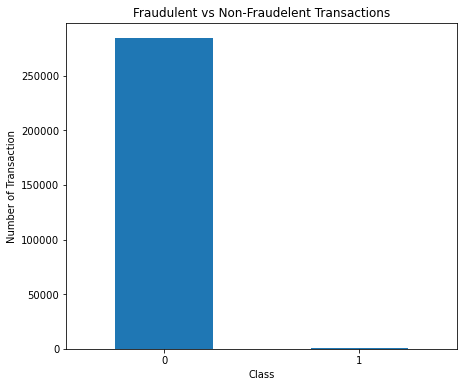

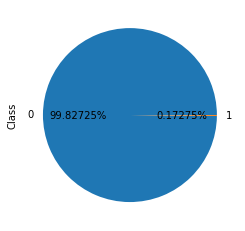

In [7]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(7,6))
classes.plot(kind = 'bar', rot=0)
plt.title("Fraudulent vs Non-Fraudelent Transactions")
plt.xlabel("Class")
plt.ylabel("Number of Transaction")
plt.show()

plt.subplot()
classes.plot.pie(autopct = "%1.5f%%")
plt.show()

In [8]:
#As time is given in relative fashion, we will need to use pandas.Timedelta which Represents a duration, the difference between two dates or times.

Delta_Time = pd.to_timedelta(df['Time'], unit='s')

#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

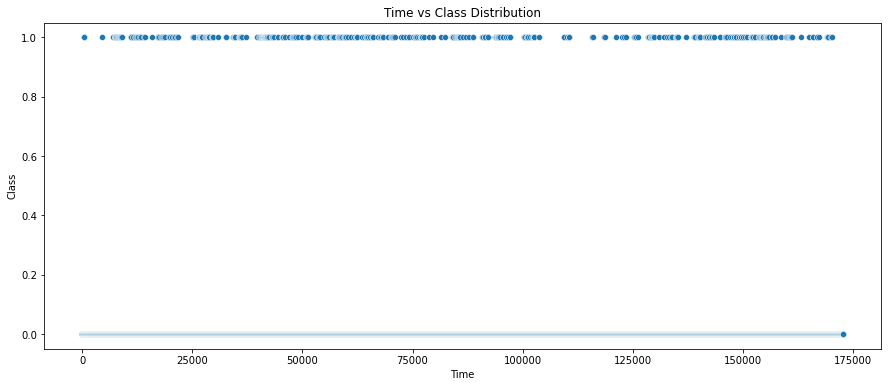

In [9]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['Time'], y=df['Class'])
plt.title("Time vs Class Distribution")
plt.show()

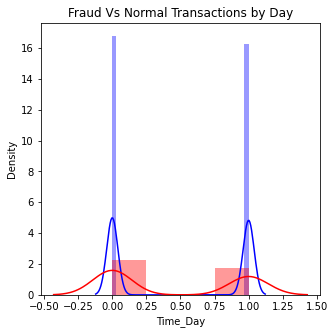

In [10]:
#The fraud Vs normal transaction by day
plt.figure(figsize=(5,5))
sns.distplot(df[df['Class'] == 0]["Time_Day"], color='blue')
sns.distplot(df[df['Class'] == 1]["Time_Day"], color='red')
plt.title('Fraud Vs Normal Transactions by Day')
plt.show()

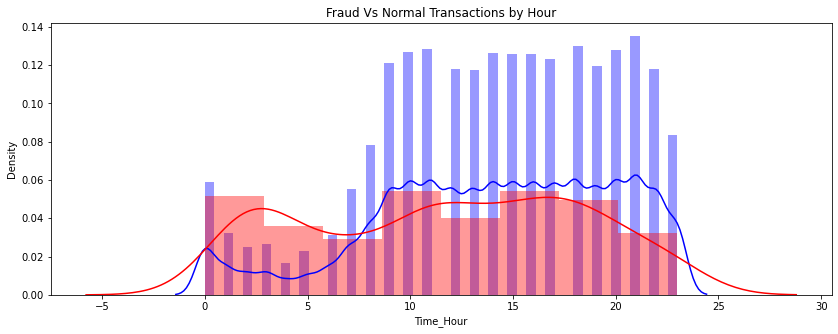

In [11]:
#The fraud Vs normal transaction by hour
plt.figure(figsize=(14,5))
sns.distplot(df[df['Class'] == 0]["Time_Hour"], color='blue')
sns.distplot(df[df['Class'] == 1]["Time_Hour"], color='red')
plt.title('Fraud Vs Normal Transactions by Hour')
plt.show()

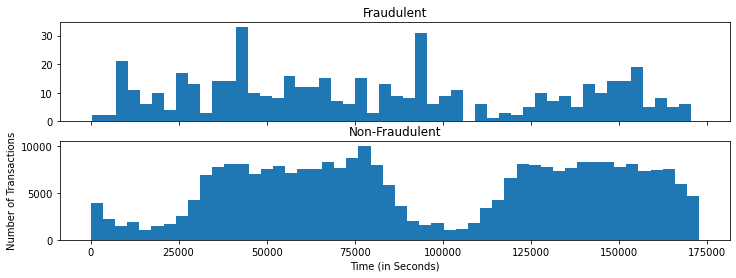

In [12]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, figsize=(12,4))

ax1.hist(df.Time[df.Class == 1], bins = 50)
ax1.set_title('Fraudulent')

ax2.hist(df.Time[df.Class == 0], bins = 50)
ax2.set_title('Non-Fraudulent')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

From the above plots it is clear that non-fradulent transactions take place at higher rate at almost every time as compared to fraudulent transactions.

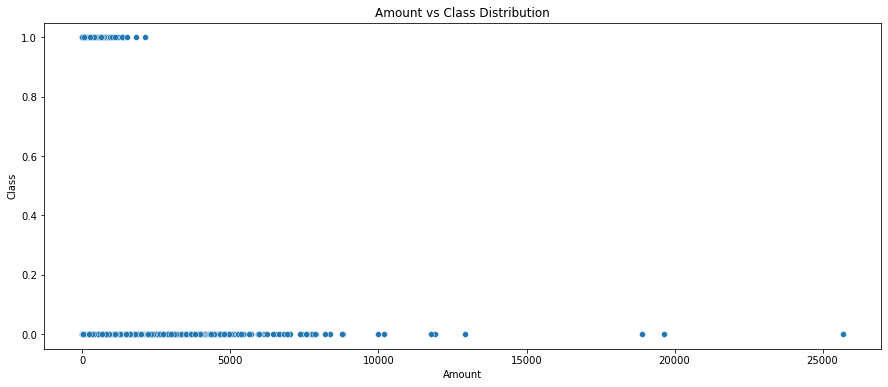

In [13]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['Amount'], y=df['Class'])
plt.title("Amount vs Class Distribution")
plt.show()

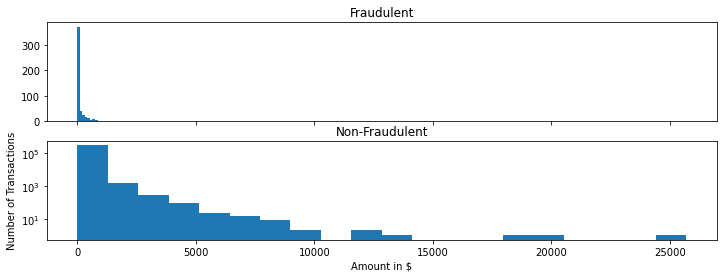

In [14]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, figsize=(12,4))

ax1.hist(df.Amount[df.Class == 1], bins = 20)
ax1.set_title('Fraudulent')

ax2.hist(df.Amount[df.Class == 0], bins = 20)
ax2.set_title('Non-Fraudulent')
plt.xlabel('Amount in $')
plt.ylabel('Number of Transactions')
plt.yscale('log') #distribution is spreaded for clear analysis
plt.show()

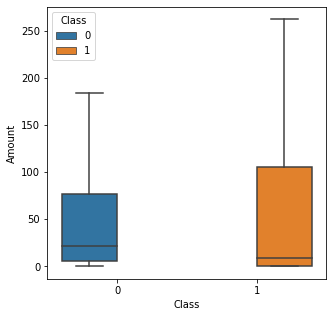

In [15]:
# Boxplot of Amount for both classes
plt.figure(figsize=(5, 5))
sns.boxplot(x = 'Class', y = 'Amount', data = df, hue='Class', showfliers=False)
plt.show()

Here too we see the same results as with Amount vs Class plots. THe number of non-fraudulent transaction in each case is more than the other class.

In [16]:
# Drop unnecessary columns
# As we have derived the Day/Hour/Minutes from the time column we will drop Time
df.drop('Time', axis = 1, inplace= True)
#also day/minutes might not be very useful as this is not time series data, we will keep only derived column hour for more specific
#information
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

### Splitting the data into train & test data

In [17]:
#Create X and y dataset for independent and dependent data
y= df['Class']
X = df.drop(['Class'], axis=1)

In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [19]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
#importing the train and test split module from sklearn
from sklearn.model_selection import train_test_split

# Splitting the dataset with train size = 80% and test = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [21]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### Plotting the distribution of a variable

In [22]:
# creating a list of column names
cols = list(X.columns.values)
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Time_Hour']

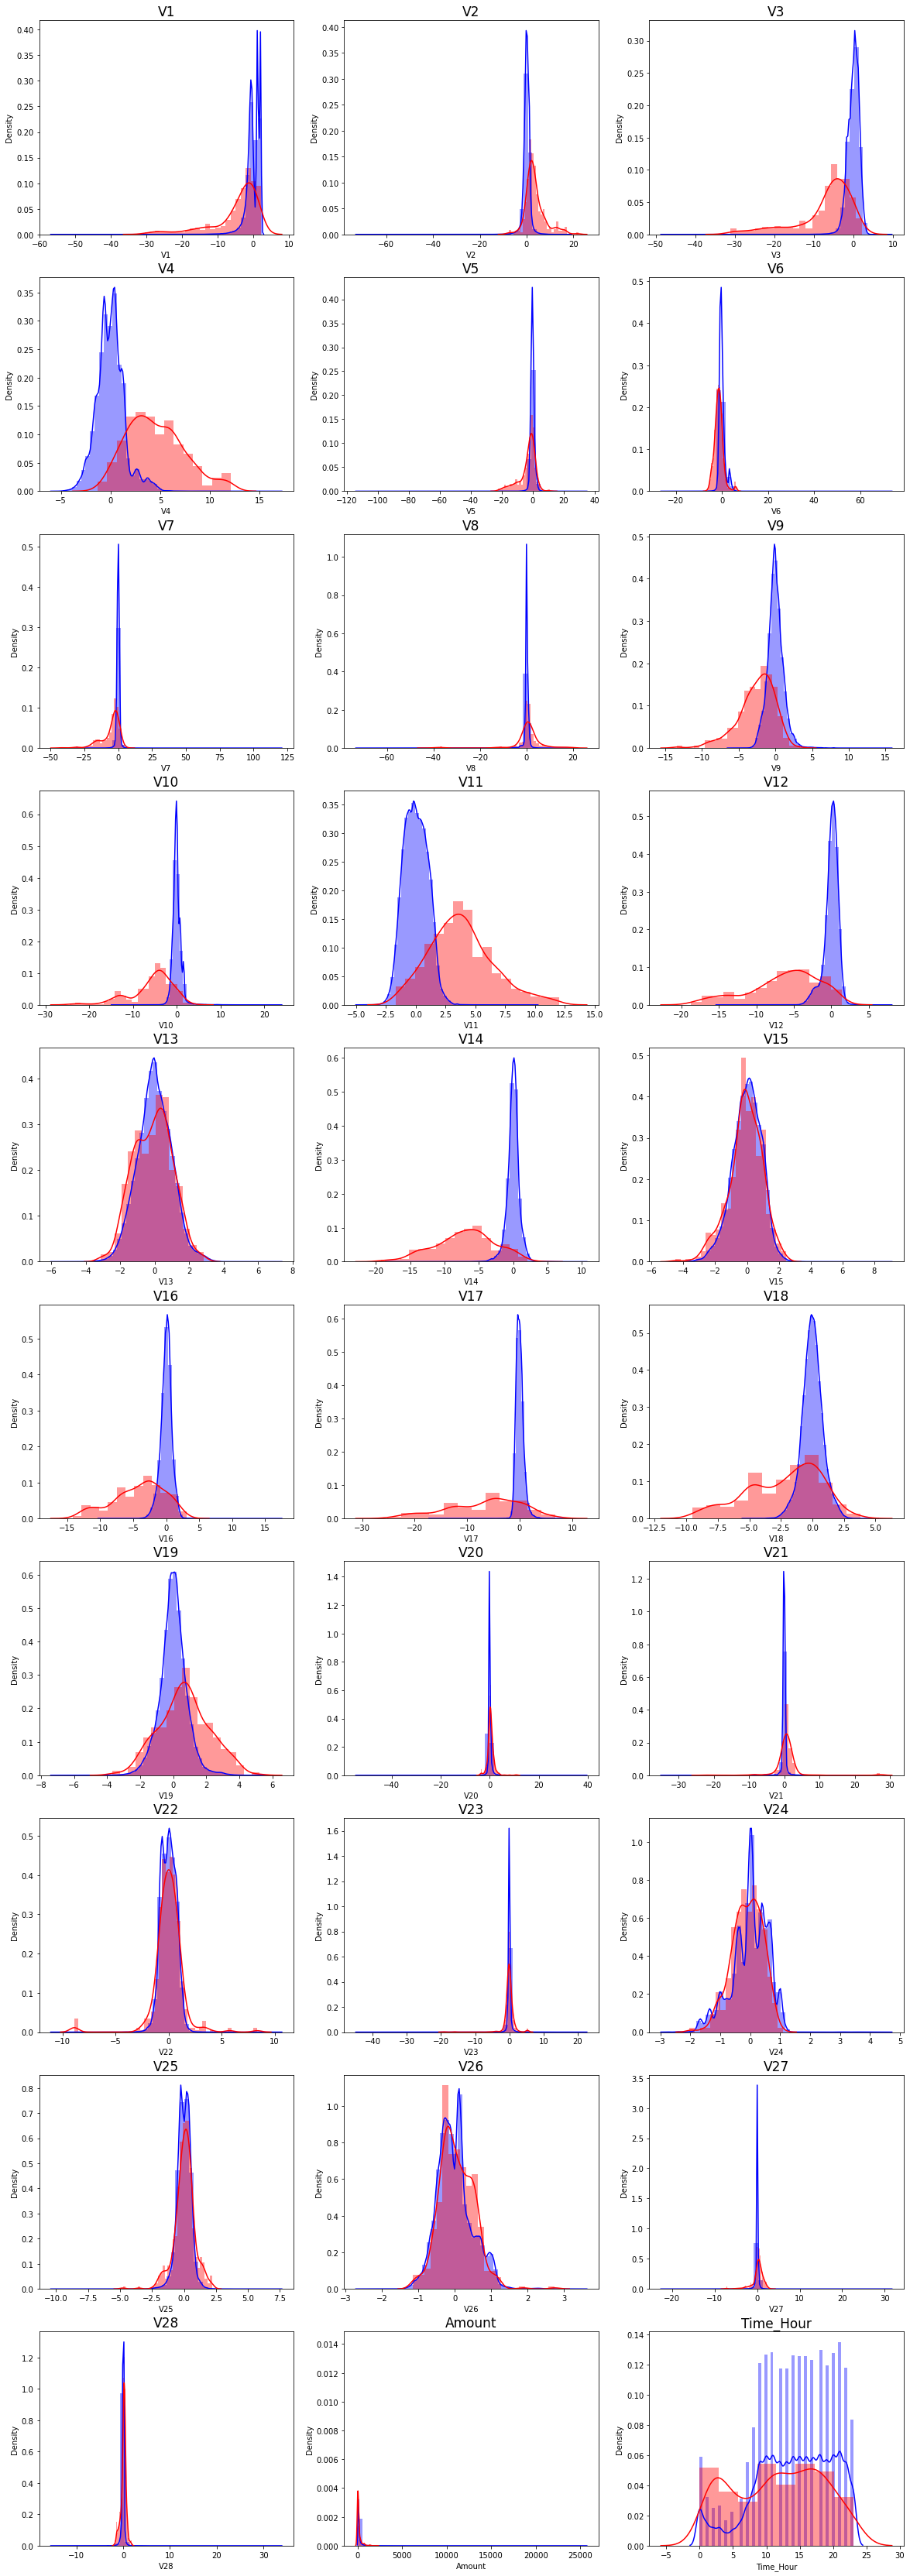

In [23]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
    plt.subplot(10, 3, n+1)
    sns.distplot(X[col][normal_records], color='blue')
    sns.distplot(X[col][fraud_records], color='red')
    plt.title(col, fontsize=17)
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [24]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures

pt = PowerTransformer()

# We will fit the PowerTransformer on training data
pt.fit(X_train)

# Then apply on all data
X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

In [25]:
# Creating a Dataframe
X_train_pt_df = pd.DataFrame(data=X_train_pt, columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt, columns=cols)

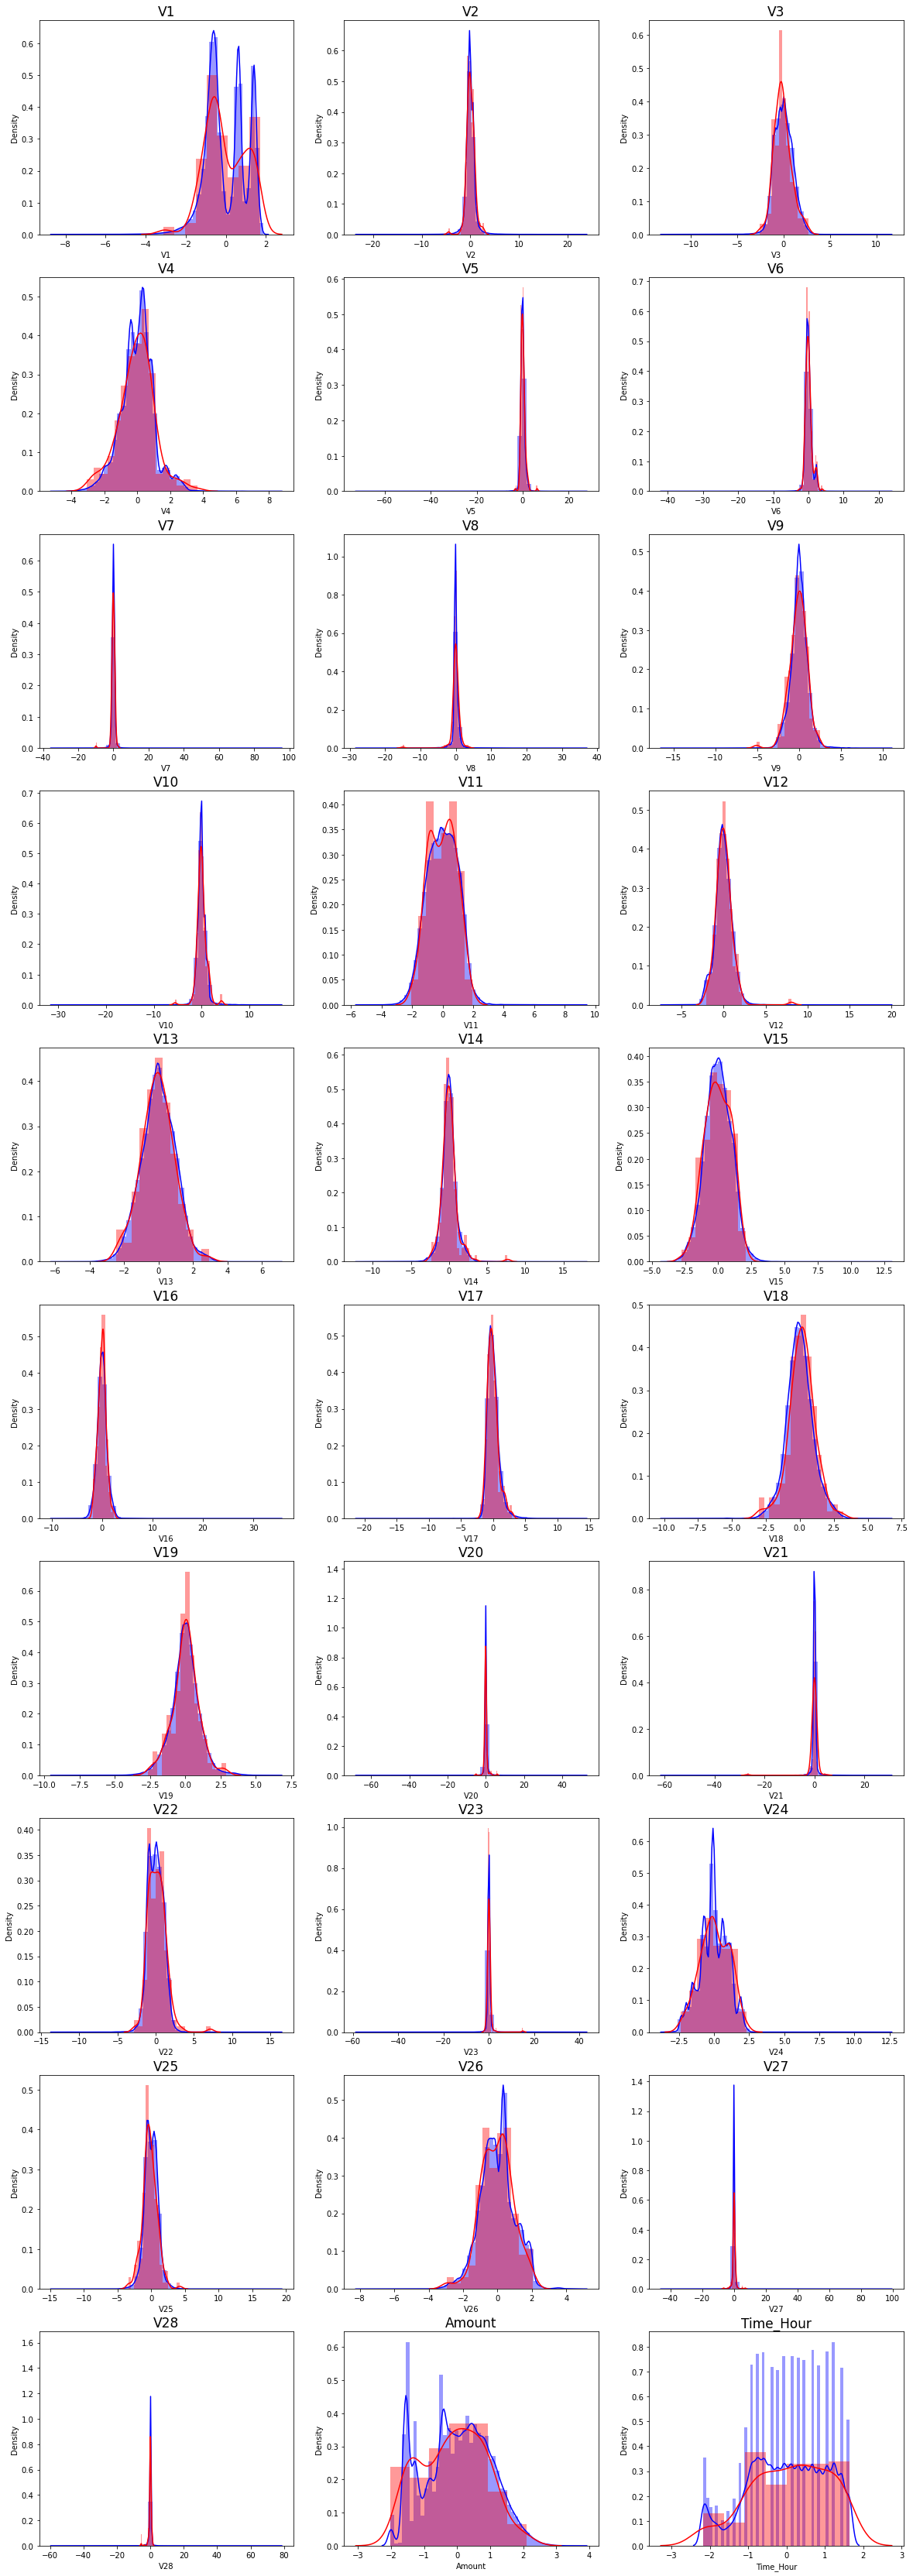

In [26]:
# plot the histogram of a variable from the dataset again to see the result 
plt.figure(figsize=(20,60))

for n, col in enumerate(cols):
    plt.subplot(10, 3, n+1)
    sns.distplot(X_train_pt_df[col][normal_records], color='blue')
    sns.distplot(X_test_pt_df[col][fraud_records], color='red')
    plt.title(col, fontsize=17)
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

In [27]:
# Creating a DataFrame to store results of all the models
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handling', 'Model', 'Accuracy', 'ROC_Value', 'Threshold'])

In [28]:
# Creating a function to plot confusion matrix 
from sklearn.metrics import confusion_matrix

def Plot_confusion_matrix(y_test, pred_test):
    cm = confusion_matrix(y_test, pred_test)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    classNames = ['Non-Fraudulent', 'Fraudulent']
    plt.title("Confusion Matrix for Test Data")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(s[i][j]) + " = " + str(cm[i][j]), fontsize=12)
    plt.show()

### Logistic Regression model

In [29]:
# Logistic Regression
# creating a function for logistic regression with l1 and l2 level of regularisation

from sklearn import linear_model #import the package
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, roc_auc_score

def LogisticRegression_Models(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    num_C = list(np.power(10.0, np.arange(-10, 10)))  #--> list of values
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)   #--> list of values

    searchCV_l2 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        penalty='l2',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='newton-cg',
        tol=10
    )

    searchCV_l1 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        penalty='l1',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='liblinear',
        tol=10
    )

    searchCV_l2.fit(X_train, y_train)
    searchCV_l1.fit(X_train, y_train)

    print("Max AUC_ROC for 12:", searchCV_l2.scores_[1].mean(axis=0).max())
    print("Max AUC_ROC for 11:", searchCV_l1.scores_[1].mean(axis=0).max())

    # calculating predicted values
    y_pred_l2 = searchCV_l2.predict(X_test)
    y_pred_l1 = searchCV_l1.predict(X_test)

    # calculating probabilities of predictions
    y_pred_prob_l2 = searchCV_l2.predict_proba(X_test)[:,1]
    y_pred_prob_l1 = searchCV_l1.predict_proba(X_test)[:,1]

    # Accuracy of l2/l1 models
    accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)
    accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)

    # L1 Model Accuracy
    print("Accuracy of Logistic Regression model with l1 regularisation : {0}".format(accuracy_l1))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l1)
    print("Classification Report")
    print(classification_report(y_test, y_pred_l1))

    # L2 Model Accuracy
    print("Accuracy of Logistic Regression model with l2 regularisation : {0}".format(accuracy_l2))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l2)
    print("Classification Report")
    print(classification_report(y_test, y_pred_l2))

    #print the evaluation result by choosing a evaluation metric for l1 model
    l1_roc_value = roc_auc_score(y_test, y_pred_prob_l1)
    print("l1 roc_value: {0}".format(l1_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_l1)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l1 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, ACU="+ str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # adding the result in the Dataframe
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImbalance, 'Model': 'Logistic Regression with L1 regularisation',
                                                'Accuracy': accuracy_l1, 'ROC_Value': l1_roc_value, 'Threshold': threshold}, index=[0]), ignore_index=True)



    #print the evaluation result by choosing a evaluation metric for l2 model
    l2_roc_value = roc_auc_score(y_test, y_pred_prob_l1)
    print("l2 roc_value: {0}".format(l2_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_l2)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l2 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, ACU="+ str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # adding the result in the Dataframe
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImbalance, 'Model': 'Logistic Regression with L2 regularisation',
                                                'Accuracy': accuracy_l2, 'ROC_Value': l2_roc_value, 'Threshold': threshold}, index=[0]), ignore_index=True)

    return df_Results


Logistic Regression with L1 and L2 Regularisation
Max AUC_ROC for 12: 0.983760023970567
Max AUC_ROC for 11: 0.985410899045824
Accuracy of Logistic Regression model with l1 regularisation : 0.9988413328183702
Confusion Matrix


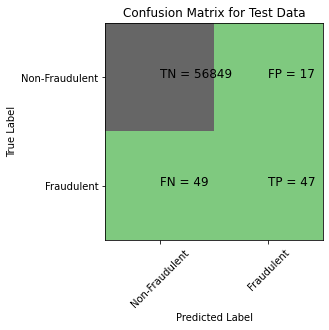

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.73      0.49      0.59        96

    accuracy                           1.00     56962
   macro avg       0.87      0.74      0.79     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy of Logistic Regression model with l2 regularisation : 0.9989993328885924
Confusion Matrix


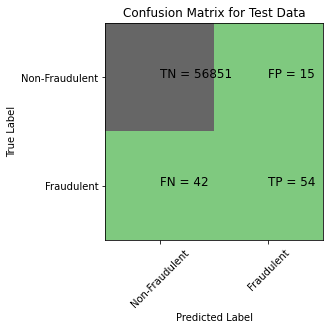

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.78      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962

l1 roc_value: 0.9639030791685718
l1 threshold: 0.009276493844821432
ROC for the test dataset 96.4%


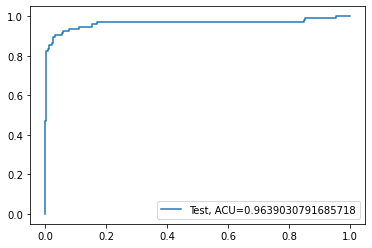

l2 roc_value: 0.9639030791685718
l2 threshold: 0.0012891785843833245
ROC for the test dataset 96.7%


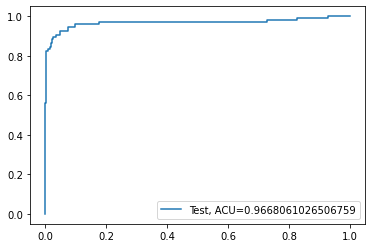

Time taken by the Model: --- 87.10799884796143 seconds ---
********************************************************************************


In [30]:
#Running the Logistic Regression models
import time
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = LogisticRegression_Models(df_Results,"Power Transformer", X_train_pt_df, y_train, X_test_pt_df, y_test)
print("Time taken by the Model: --- %s seconds ---" % (time.time() - start_time))
print('*'*80)

In [31]:
df_Results.head()

,Data_Imbalance_Handling,Model,Accuracy,ROC_Value,Threshold
0,Power Transformer,Logistic Regression with L1 regularisation,0.998841,0.963903,0.009276
1,Power Transformer,Logistic Regression with L2 regularisation,0.998999,0.963903,0.001289


#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

We will perform two types of cross validation
- RepeatedKFold 
- StratifiedKFold

#### RepeatedKFold Cross Validation

In [32]:
#perform cross validation
# Performing Cross Validation using RepeatedKFold

from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)

# We know that X is the feature set and y is the target set
for train_index, test_index in rkf.split(X, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

Logistic Regression with L1 and L2 Regularisation
Max AUC_ROC for 12: 0.9826547285338044
Max AUC_ROC for 11: 0.9718292981708132
Accuracy of Logistic Regression model with l1 regularisation : 0.9989466477063254
Confusion Matrix


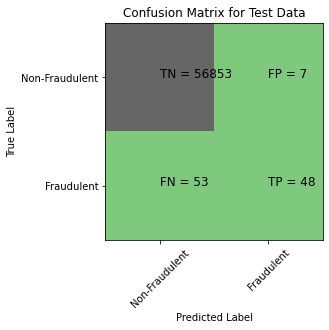

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56860
           1       0.87      0.48      0.62       101

    accuracy                           1.00     56961
   macro avg       0.94      0.74      0.81     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic Regression model with l2 regularisation : 0.9989290918347641
Confusion Matrix


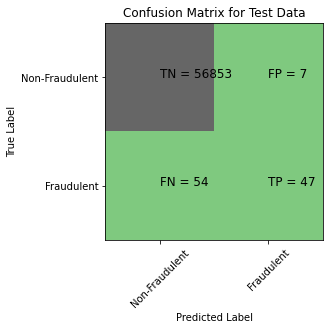

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56860
           1       0.87      0.47      0.61       101

    accuracy                           1.00     56961
   macro avg       0.93      0.73      0.80     56961
weighted avg       1.00      1.00      1.00     56961

l1 roc_value: 0.8659141960625889
l1 threshold: 0.04735333476808608
ROC for the test dataset 86.6%


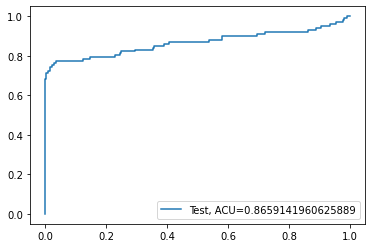

l2 roc_value: 0.8659141960625889
l2 threshold: 0.0012178018187718126
ROC for the test dataset 99.1%


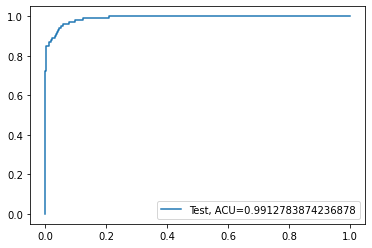

Time taken by the Model: --- 179.28999614715576 seconds ---
********************************************************************************


In [33]:
# Running the model again after RepeatedKFold cross validation
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = LogisticRegression_Models(df_Results,"RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time taken by the Model: --- %s seconds ---" % (time.time() - start_time))
print('*'*80)

In [34]:
df_Results

,Data_Imbalance_Handling,Model,Accuracy,ROC_Value,Threshold
0,Power Transformer,Logistic Regression with L1 regularisation,0.998841,0.963903,0.009276
1,Power Transformer,Logistic Regression with L2 regularisation,0.998999,0.963903,0.001289
2,RepeatedKFold Cross Validation,Logistic Regression with L1 regularisation,0.998947,0.865914,0.047353
3,RepeatedKFold Cross Validation,Logistic Regression with L2 regularisation,0.998929,0.865914,0.001218


#### StratifiedKFold cross validation

In [35]:
# Performing Cross Validation using StratifiedKFold

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)

# We know that X is the feature set and y is the target set
for train_index, test_index in skf.split(X,y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

Logistic Regression with L1 and L2 Regularisation
Max AUC_ROC for 12: 0.9822554560154433
Max AUC_ROC for 11: 0.9652106893977332
Accuracy of Logistic Regression model with l1 regularisation : 0.9987535331191517
Confusion Matrix


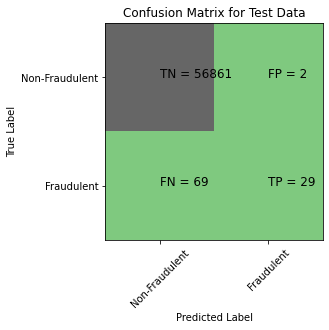

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.97      0.65      0.72     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic Regression model with l2 regularisation : 0.998771088990713
Confusion Matrix


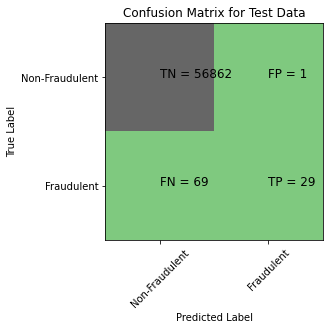

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

l1 roc_value: 0.8890758561483437
l1 threshold: 0.021087492766199856
ROC for the test dataset 88.9%


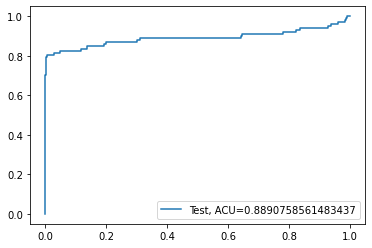

l2 roc_value: 0.8890758561483437
l2 threshold: 0.0015423627352377
ROC for the test dataset 98.3%


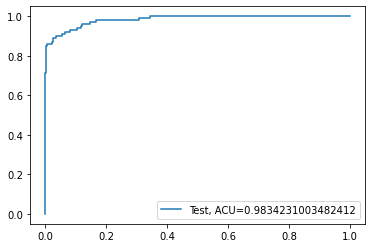

Time taken by the Model: --- 173.10400104522705 seconds ---
********************************************************************************


In [36]:
# Running the Logistic Regression model again after StratifiedKFold cross validation
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = LogisticRegression_Models(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time taken by the Model: --- %s seconds ---" % (time.time() - start_time))
print('*'*80)

In [37]:
df_Results

,Data_Imbalance_Handling,Model,Accuracy,ROC_Value,Threshold
0,Power Transformer,Logistic Regression with L1 regularisation,0.998841,0.963903,0.009276
1,Power Transformer,Logistic Regression with L2 regularisation,0.998999,0.963903,0.001289
2,RepeatedKFold Cross Validation,Logistic Regression with L1 regularisation,0.998947,0.865914,0.047353
3,RepeatedKFold Cross Validation,Logistic Regression with L2 regularisation,0.998929,0.865914,0.001218
4,StratifiedKFold Cross Validation,Logistic Regression with L1 regularisation,0.998754,0.889076,0.021087
5,StratifiedKFold Cross Validation,Logistic Regression with L2 regularisation,0.998771,0.889076,0.001542


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

**We will create function of all the models first and then call them together for ease of understanding.**

### KNN Model

In [38]:
# importing required functions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

# Creating a function for KNN
def KNN_Models(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=5, n_jobs=16)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print("Model Score")
    print(score)
    
    # Accuracy
    y_pred = knn.predict(X_test)
    KNN_accuracy = metrics.accuracy_score(y_pred = y_pred, y_true = y_test)
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    
    knn_prob = knn.predict_proba(X_test)[:, 1]
    
    #Calculating roc_auc value
    knn_roc_val = roc_auc_score(y_test, knn_prob)
    print("KNN roc_value: {0}" .format(knn_roc_val))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_prob)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("KNN threshold: {0}" .format(threshold))
    
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the Test Dataset", "{:.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc = "+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImbalance, 'Model': 'KNN', 'Accuracy': score,
                                            'ROC_Value': knn_roc_val, 'Threshold': threshold}, index=[0]), ignore_index=True)
    
    return df_Results

### SVM Model

In [39]:
# importing required SVM libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# creating a function for SVM model
def SVM_Model(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    clf = SVC(kernel='sigmoid', random_state=42)
    clf.fit(X_train, y_train)
    y_pred_SVM = clf.predict(X_test)
    SVM_score = accuracy_score(y_test, y_pred_SVM)
    print("accuracy_score : {0}".format(SVM_score))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_SVM)
    print("Classification Report")
    print(classification_report(y_test, y_pred_SVM))
    
    #Running classifier
    classifier = SVC(kernel='sigmoid', probability=True)
    svm_prob = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    
    # Calculation ROC_AUC value
    roc_value = roc_auc_score(y_test, svm_prob)
    
    print("SVM roc_value: {0}".format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_prob)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("SVM threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the Test Dataset", "{:,.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc= "+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImbalance, 'Model': 'SVM', 'Accuracy':SVM_score, 
                                                 'ROC_value': roc_value, 'Threshold': threshold}, index=[0]), ignore_index=True)
    
    return df_Results

### Decision Tree Model

In [45]:
# importing required DecisionTree libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# creating a function for DecisionTree model
def DecisionTree_Model(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    # declairing important variables and its values 
    criteria = ['gini', 'entropy']
    scores = {}
    
    for c in criteria:
        dt = DecisionTreeClassifier(criterion= c, random_state=42)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        test_score = dt.score(X_test, y_test)
        tree_pred = dt.predict_proba(X_test)[:, 1]
        tree_roc_value = roc_auc_score(y_test, tree_pred)
        scores = test_score
        print(c + "score: {0}".format(test_score))
        print("Confusion Matrix")
        Plot_confusion_matrix(y_test, y_pred)
        print("Classification Report")
        print(classification_report(y_test, y_pred))
        print(c + "tree_roc_value: {0}".format(tree_roc_value))
        fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_pred)
        threshold = thresholds[np.argmax(tpr-fpr)]
        print("Tree thresholds: {0}".format(threshold))
        roc_auc = metrics.auc(fpr, tpr)
        print("ROC for the Test Dataset", '{:.1%}'.format(roc_auc))
        plt.plot(fpr, tpr, label="Test, auc= "+str(roc_auc))
        plt.legend(loc=4)
        plt.show()
        
        df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling':DataImbalance, 'Model':'Tree Model with {0} criteria'.format(c),
                                                    'Accuracy':test_score, 'ROC_value':tree_roc_value, 'Threshold':threshold}, index=[0]),
                                                     ignore_index=True)
        
        return df_Results

### Random Forest Model

In [41]:
# importing required Random Forest libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# creating a function for Random Forest model

def RandomForest_Model(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    
    #Model with 100 trees
    RF_model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt', random_state=42)
    
    #Fitting the model on training data
    RF_model.fit(X_train, y_train)
    RF_test_score = RF_model.score(X_test, y_test)
    RF_model.predict(X_test)
    print("Model Accuracy: {0}".format(RF_test_score))
    
    # Predictions
    rf_predictions = RF_model.predict(X_test)
    
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, rf_predictions)
    print("Classification Report")
    print(classification_report(y_test, rf_predictions))
    
    # Class probabilities
    rf_prob = RF_model.predict_proba(X_test)[:, 1]
    
    #Calculation ROC_AUC
    roc_value = roc_auc_score(y_test, rf_prob)
    
    print("Random Forest roc_value: {0}".format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_prob)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Random Forest threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the Test Dataset", "{:.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc= "+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImbalance, 'Model': 'Random Forest', 
                                                'Accuracy':RF_test_score, 'ROC_value': roc_value, 'Threshold': threshold},
                                                index=[0]), ignore_index=True)
    
    return df_Results
    

### XGBoost Model

In [42]:
# importing xgboost libraries and metrics from sklearn
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# creating a function for XGBoost model
def XGBoost_Model(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    XGBModel = XGBClassifier(random_state=42)
    
    #fitting the model on training data
    XGBModel.fit(X_train, y_train)
    
    y_pred = XGBModel.predict(X_test)
    
    XGB_test_score = XGBModel.score(X_test, y_test)
    print("Model Accuracy: {0}".format(XGB_test_score))
    
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    
    #calculating probabilites of each class
    XGB_prob = XGBModel.predict_proba(X_test)[:, 1]
    
    #Calculating ROC AUc
    XGB_roc_value = roc_auc_score(y_test, XGB_prob)
    
    print ("XGBoost roc_value: {0}".format(XGB_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_prob)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("XGBoost threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the Test Dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc= "+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImbalance, 'Model': "XGBoost", 
                                                 'Accuracy': XGB_test_score, 'ROC_value': XGB_roc_value, 'Threshold': threshold},
                                               index=[0]), ignore_index=True)
    
    return df_Results

#### Running all the above models with PowerTransformer, RepeatedKFold and StratifiedKFold.

**Power Transformer**

KNN Model
Model Score
0.9992977774656788
Confusion Matrix


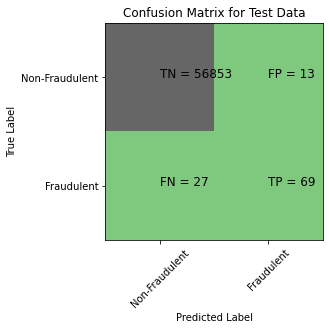

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.72      0.78        96

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.900851068740548
KNN threshold: 0.2
ROC for the Test Dataset 90.1%


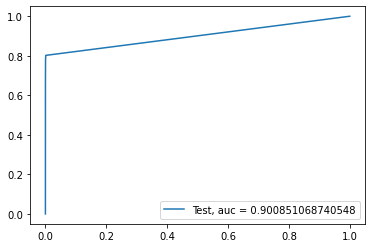

Time Taken by Model: --- 734.6935522556305 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
giniscore: 0.9988062216916541
Confusion Matrix


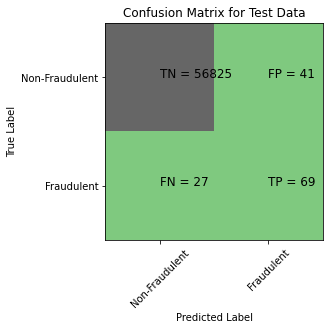

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.63      0.72      0.67        96

    accuracy                           1.00     56962
   macro avg       0.81      0.86      0.83     56962
weighted avg       1.00      1.00      1.00     56962

ginitree_roc_value: 0.8590145033939437
Tree thresholds: 1.0
ROC for the Test Dataset 85.9%


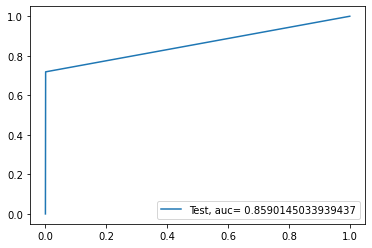

Time Taken by Model: --- 14.491998672485352 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9993504441557529
Confusion Matrix


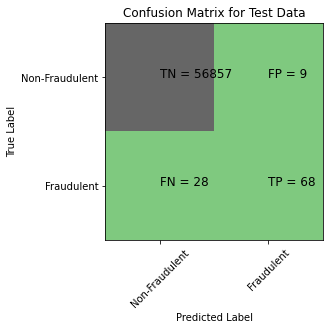

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.71      0.79        96

    accuracy                           1.00     56962
   macro avg       0.94      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest roc_value: 0.940564037972309
Random Forest threshold: 0.01
ROC for the Test Dataset 94.1%


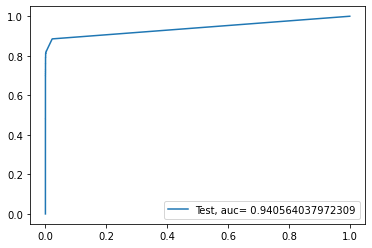

Time Taken by Model: --- 147.3120014667511 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994557775359011
Confusion Matrix


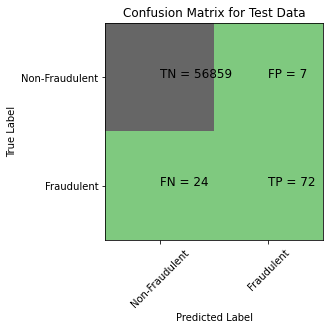

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.91      0.75      0.82        96

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962

XGBoost roc_value: 0.9729984744838744
XGBoost threshold: 5.146709372638725e-05
ROC for the Test Dataset 97.3%


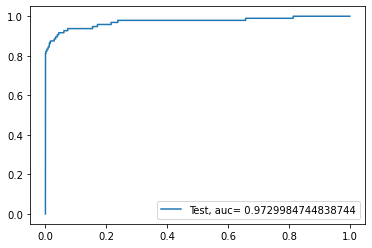

Time Taken by Model: --- 15.806427240371704 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9985604438046417
Confusion Matrix


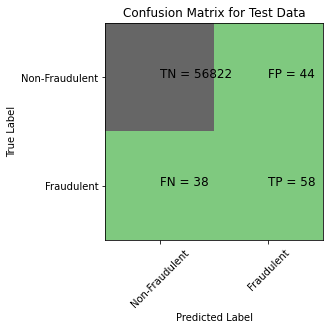

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.57      0.60      0.59        96

    accuracy                           1.00     56962
   macro avg       0.78      0.80      0.79     56962
weighted avg       1.00      1.00      1.00     56962

SVM roc_value: 0.8913148527532562
SVM threshold: 0.0010185768804777025
ROC for the Test Dataset 89.1%


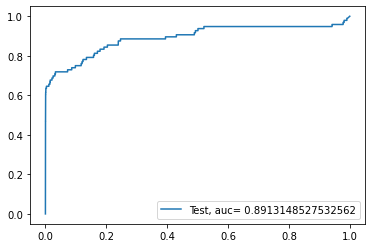

Time Taken by Model: --- 65.81654000282288 seconds ---


In [46]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = KNN_Models(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = DecisionTree_Model(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = RandomForest_Model(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = XGBoost_Model(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = SVM_Model(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

**RepeatedKFold**

KNN Model
Model Score
0.9991046505503766
Confusion Matrix


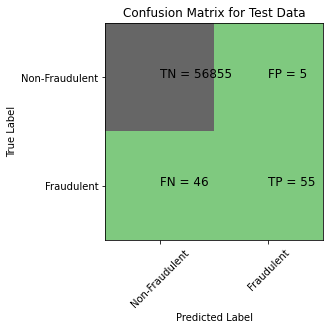

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56860
           1       0.92      0.54      0.68       101

    accuracy                           1.00     56961
   macro avg       0.96      0.77      0.84     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8413444694803636
KNN threshold: 0.2
ROC for the Test Dataset 84.1%


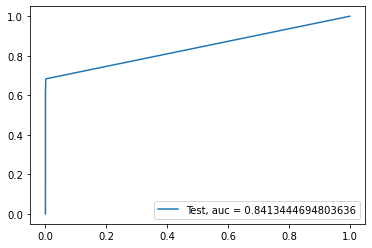

Time Taken by Model: --- 730.0309872627258 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
giniscore: 0.9992275416513052
Confusion Matrix


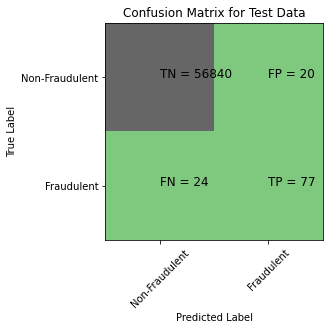

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56860
           1       0.79      0.76      0.78       101

    accuracy                           1.00     56961
   macro avg       0.90      0.88      0.89     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.8810122482526128
Tree thresholds: 1.0
ROC for the Test Dataset 88.1%


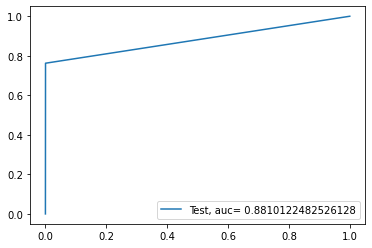

Time Taken by Model: --- 14.025001287460327 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995259914678464
Confusion Matrix


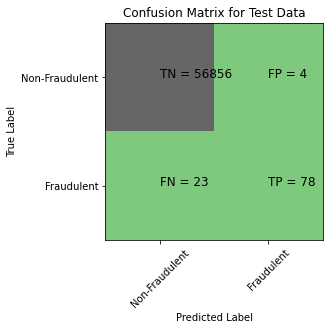

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56860
           1       0.95      0.77      0.85       101

    accuracy                           1.00     56961
   macro avg       0.98      0.89      0.93     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9239311945615948
Random Forest threshold: 0.03
ROC for the Test Dataset 92.4%


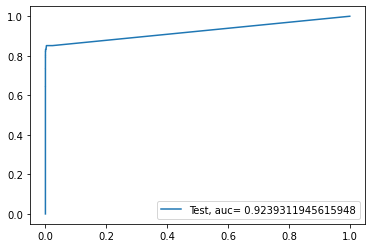

Time Taken by Model: --- 148.5415997505188 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994733238531627
Confusion Matrix


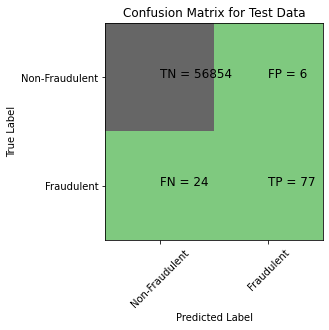

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56860
           1       0.93      0.76      0.84       101

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9741022765660315
XGBoost threshold: 5.7002635003300384e-05
ROC for the Test Dataset 97.4%


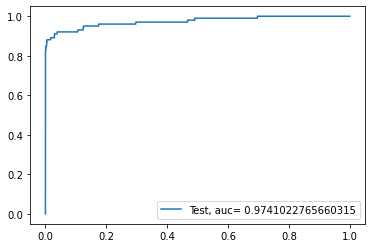

Time Taken by Model: --- 15.899999856948853 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9982444128438757
Confusion Matrix


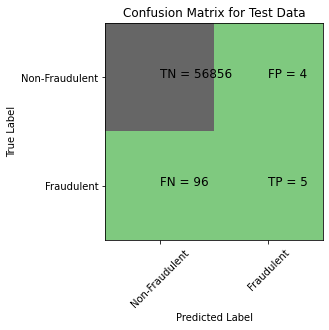

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56860
           1       0.56      0.05      0.09       101

    accuracy                           1.00     56961
   macro avg       0.78      0.52      0.55     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.49634868340861527
SVM threshold: 0.0032767608416357165
ROC for the Test Dataset 49.6%


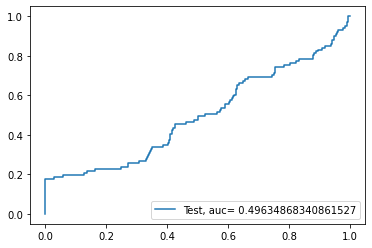

Time Taken by Model: --- 187.52902483940125 seconds ---


In [47]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = KNN_Models(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = DecisionTree_Model(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = RandomForest_Model(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = XGBoost_Model(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = SVM_Model(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

**StratifiedKFold**

In [ ]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = KNN_Models(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = DecisionTree_Model(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = RandomForest_Model(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = XGBoost_Model(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = SVM_Model(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

KNN Model


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
clf = ___  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
print --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = ______  #--> list of values
cv_num =   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [ ]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Print the class distribution after applying SMOTE 

In [ ]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)